## Principal Component Analysis (PCA) 

Principal Component Analysis (PCA) can be used for the following applications:

1. Dimensionality Reduction
2. Visualization of High Dimensional Data
3. Noise Filtering
4. Feature Selection Within High-Dimensional Data

Jupyter Notebook usually don't provide intellisense. We can activate intellisense by usng the following command and hit "Tab" key after giving dot operator:

In [1]:
%config IPCompleter.greedy=True

#### Principal Component Analysis (PCA)

In [2]:
import numpy as np
x=[]
y=[]
for i in range(500):
    x.append(np.random.randint(1,200))
    y.append(np.random.randint(1,50))


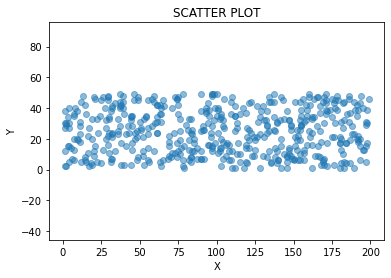

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y,alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SCATTER PLOT")
plt.axis('equal')
plt.show()

In [4]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2)
df = pd.DataFrame({"X":x,"Y":y})
pca.fit(df)
print(pca.components_)

[[-0.99999679 -0.00253512]
 [-0.00253512  0.99999679]]


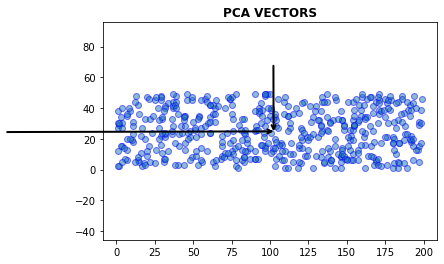

In [5]:
def pca_vector(v0,v1,axis=None):
    ax = plt.gca()
    arrowprops = dict(arrowstyle = "->",linewidth=2.0,shrinkA=0,shrinkB=0)
    ax.annotate("",v0,v1,arrowprops=arrowprops)

plt.scatter(x,y,alpha=0.5,edgecolor='b')
for length,vector in zip(pca.explained_variance_,pca.components_):
    vec=vector*3*np.sqrt(length)
    pca_vector(pca.mean_,pca.mean_+vec)
plt.axis('equal') 
plt.title("PCA VECTORS",fontweight='bold')
plt.show()
    

The above picture shows the direction of two principal components. Length of the arrow represents how important it is to show the distribution of data. The largest component is the direction that maximizes the variance of the projected data, and the smallest principal component minimizes that variance.

#### Dimensionality Reduction 

In dimensionality reduction, objective is to remove one or more smallest components.

In [6]:
pca = PCA(n_components=1)
pca.fit(df)
trns_x = pca.transform(df)
print(f"Original Dimension {df.shape}")
print(f"Transformed Shape {trns_x.shape}")

Original Dimension (500, 2)
Transformed Shape (500, 1)


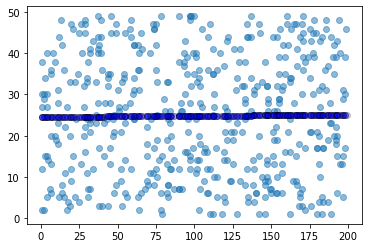

In [7]:
x_trns = pca.inverse_transform(trns_x)
plt.scatter(x,y,alpha=0.5)
plt.scatter(x_trns[:,0],x_trns[:,1],alpha=0.2,color='b',edgecolor='k')
#plt.axis('equal')
plt.show()

Let us consider Wine.csv dataset to understand more about dimensionality reduction using **_Principal_ _Component_ _Analysis_**.

In [8]:
df_wine = pd.read_csv("Wine.csv")
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In Wine.csv, we have 13 independent predictors and we need to convert the high dimentional data to corresponding low dimensional data.

In [9]:
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Choosing the number of components 

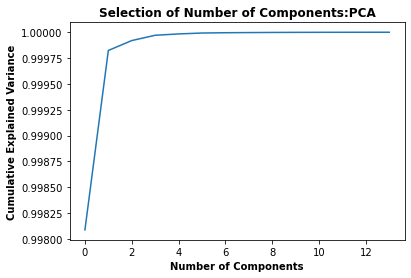

In [10]:
pca_wine = PCA().fit(df_wine)
plt.plot(np.cumsum(pca_wine.explained_variance_ratio_))
plt.xlabel("Number of Components",fontweight="bold")
plt.ylabel("Cumulative Explained Variance",fontweight="bold")
plt.title("Selection of Number of Components:PCA",fontweight="bold")
plt.show()

The above figure shows that 2 components can explain more than 99% of variance of data. There are three different dimensionality reduction methods:

1. **Principal Component Ananlysis**
2. **Isometric Mapping**
3. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**


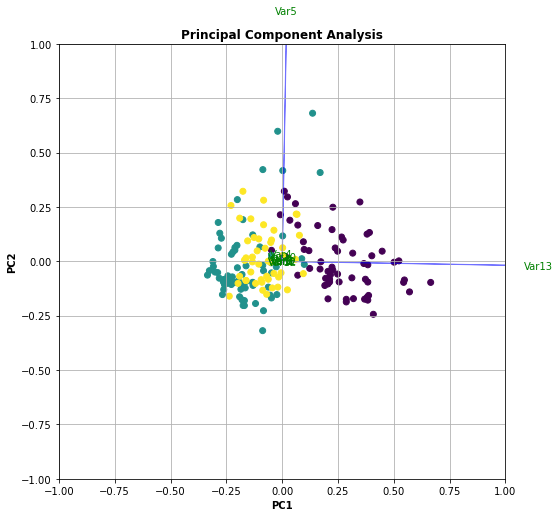

In [11]:
X = df_wine.drop("Customer_Segment",axis=1)
y = df_wine["Customer_Segment"]
pca=PCA()
pca_wine = pca.fit_transform(X)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'b',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1),fontweight="bold")
plt.ylabel("PC{}".format(2),fontweight="bold")
plt.title("Principal Component Analysis",fontweight="bold")
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_wine[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()



#### Isometric Mapping 

Isometric mapping convert the high dimensional data to low dimensional data using a non-linear function and the non-linear function is senstive to n_neighbors.

In [12]:
from sklearn.manifold import Isomap

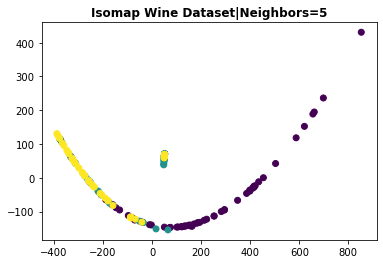

In [13]:
isomap = Isomap(n_components=2,n_neighbors=5)
x_isomap = isomap.fit_transform(X)
plt.scatter(x_isomap[:,0],x_isomap[:,1],c=y)
plt.title("Isomap Wine Dataset|Neighbors=5",fontweight="bold")
plt.show()

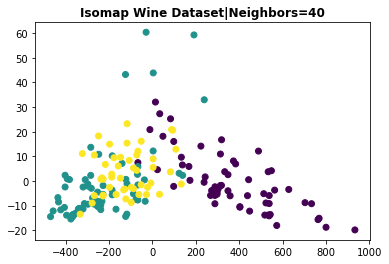

In [14]:
isomap = Isomap(n_components=2,n_neighbors=40)
x_isomap = isomap.fit_transform(X)
plt.scatter(x_isomap[:,0],x_isomap[:,1],c=y)
plt.title("Isomap Wine Dataset|Neighbors=40",fontweight="bold")
plt.show()

In [15]:
from sklearn.manifold import TSNE

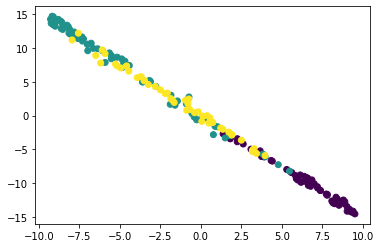

<Figure size 432x432 with 0 Axes>

In [17]:
tsne = TSNE(random_state=1234,learning_rate=5,metric="euclidean").fit_transform(X)
plt.scatter(tsne[:,0],tsne[:,1],c=y)
plt.figure(figsize=(6,6))
#plt.title("tSNE Wine Dataset|Metric:Euclidean")
plt.show()

#### References 

1. Van Der Maaten,L. and Hinton,J.(2008) Visualizig Data using t-SNE,Journal of Machine Learning Research,Vol.9,2579-2605 